# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [1]:
# подключить необходимые библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Ваш код здесь

In [2]:
# считать данные
df = pd.read_csv('data-1670631711407.csv')
df
# Ваш код здесь

,id,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loans,closed_loans
0,106809576,0,23,2,1,0,0,0,10000.0,1,0
1,106806971,0,38,2,1,0,0,0,50000.0,1,0
2,106811866,0,30,2,1,0,0,0,20000.0,1,0
3,106806727,0,35,2,1,1,0,0,15000.0,1,0
4,106806928,0,35,2,1,0,2,2,40000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15218,106815985,0,51,2,1,0,1,0,13500.0,1,1
15219,106806187,0,42,2,1,1,3,0,8000.0,1,0
15220,106814424,1,45,2,1,1,2,1,7000.0,3,3
15221,106810814,0,45,1,2,1,2,1,6000.0,1,1


In [3]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы
# Удалим лишний столбец
df = df.drop(columns=['id'])
df
# Ваш код здесь

,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loans,closed_loans
0,0,23,2,1,0,0,0,10000.0,1,0
1,0,38,2,1,0,0,0,50000.0,1,0
2,0,30,2,1,0,0,0,20000.0,1,0
3,0,35,2,1,1,0,0,15000.0,1,0
4,0,35,2,1,0,2,2,40000.0,1,0
...,...,...,...,...,...,...,...,...,...,...
15218,0,51,2,1,0,1,0,13500.0,1,1
15219,0,42,2,1,1,3,0,8000.0,1,0
15220,1,45,2,1,1,2,1,7000.0,3,3
15221,0,45,1,2,1,2,1,6000.0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             15223 non-null  int64  
 1   age                15223 non-null  int64  
 2   socstatus_work_fl  15223 non-null  int64  
 3   socstatus_pens_fl  15223 non-null  int64  
 4   gender             15223 non-null  int64  
 5   child_total        15223 non-null  int64  
 6   dependants         15223 non-null  int64  
 7   personal_income    15223 non-null  float64
 8   loans              15223 non-null  int64  
 9   closed_loans       15223 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.2 MB


In [5]:
df.describe()

,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loans,closed_loans
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,0.119030,40.406096,1.909610,1.134468,0.654536,1.099389,0.645208,13853.836323,1.387769,0.751889
std,0.323835,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.793566,0.988499
min,0.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,0.000000,30.000000,2.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,0.000000,39.000000,2.000000,1.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,0.000000
75%,0.000000,50.000000,2.000000,1.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,1.000000,67.000000,2.000000,2.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


Пустые значения отсутствуют (были почищены на этапе sql запроса)

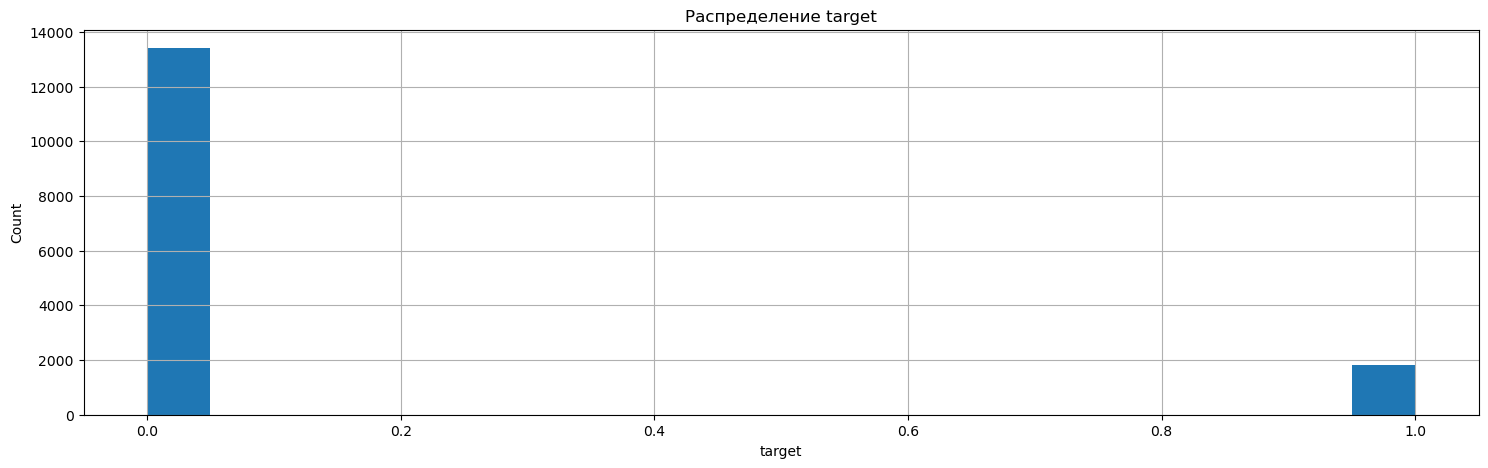

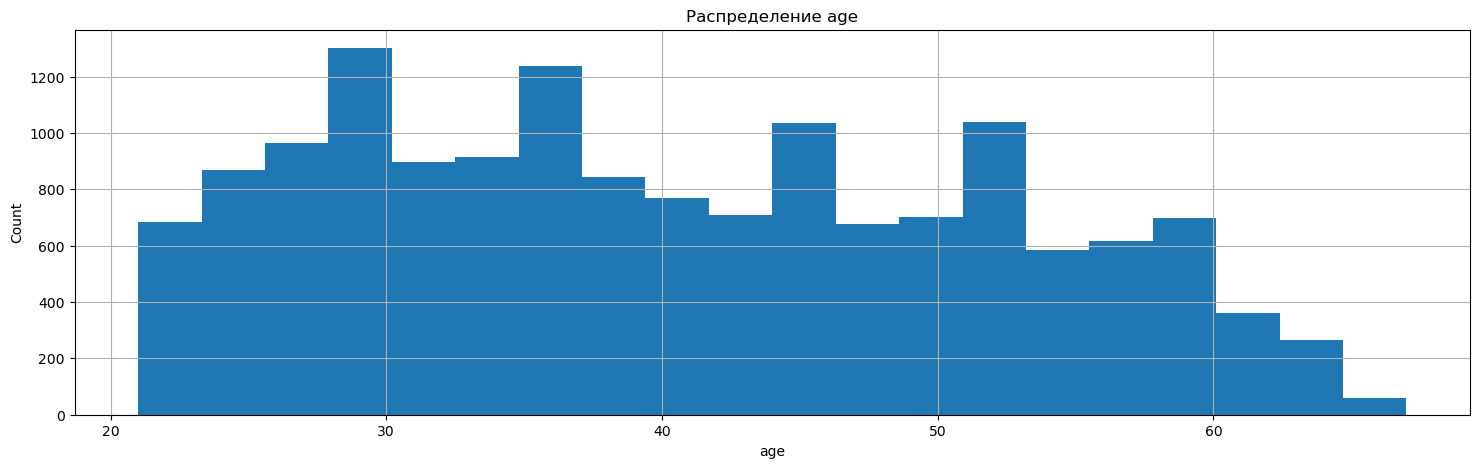

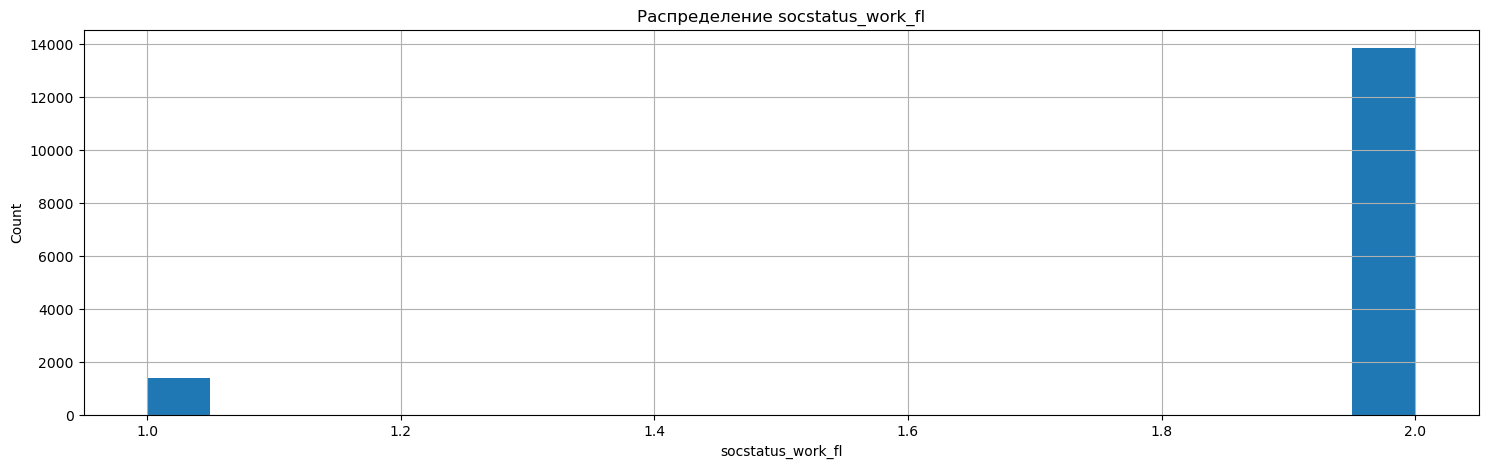

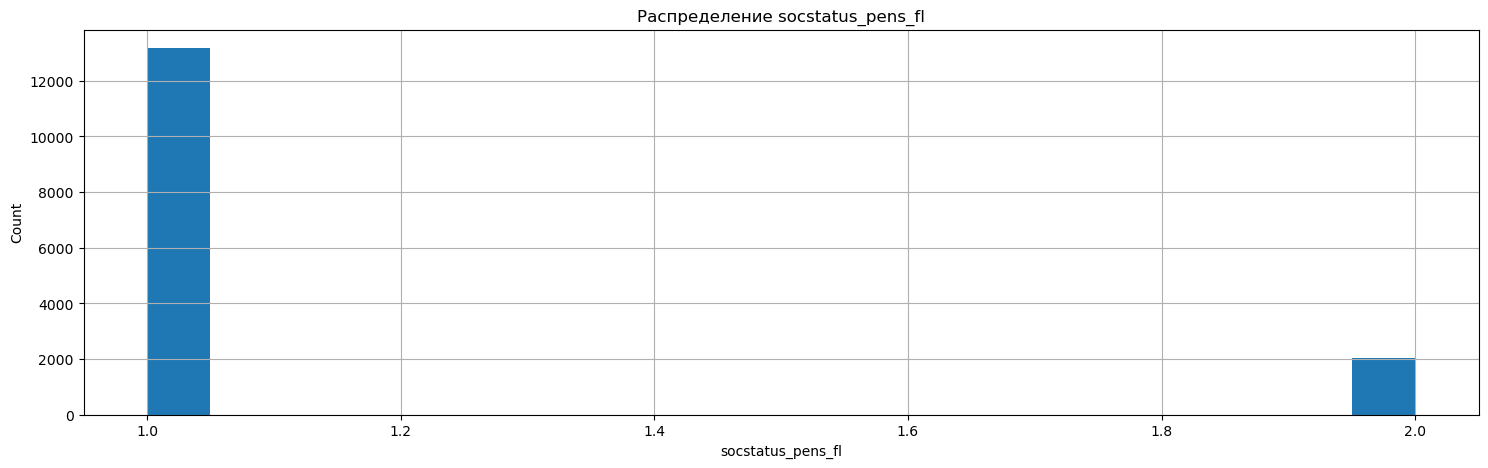

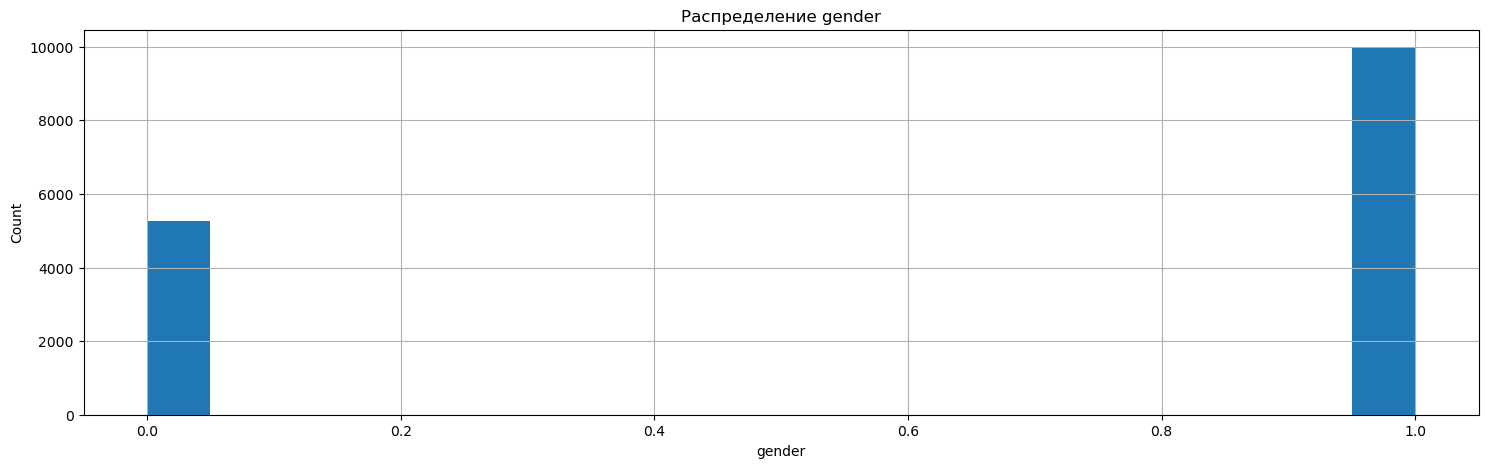

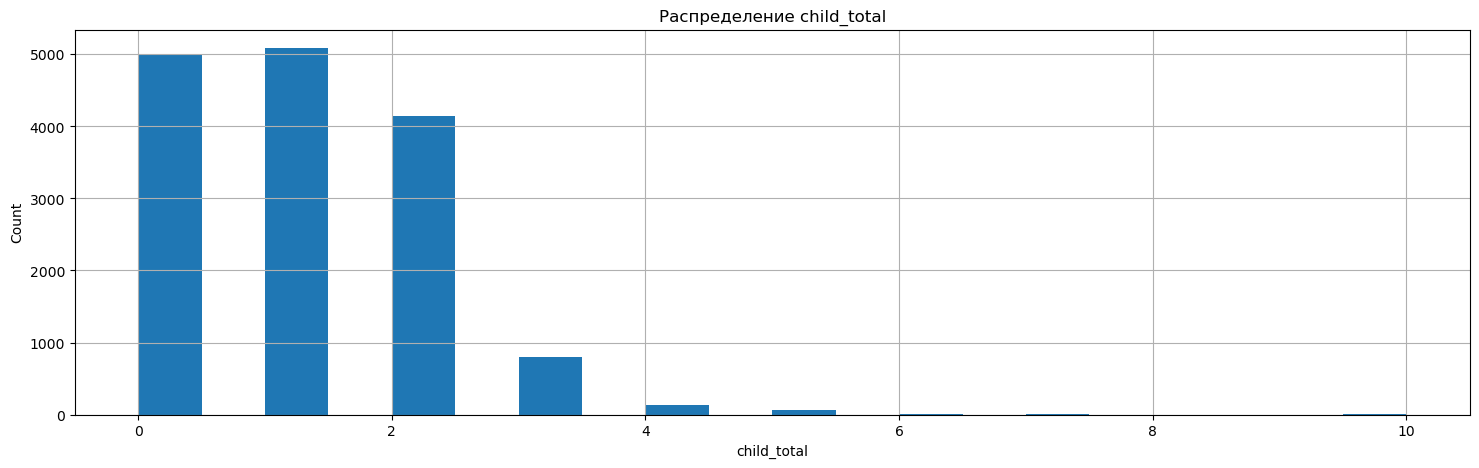

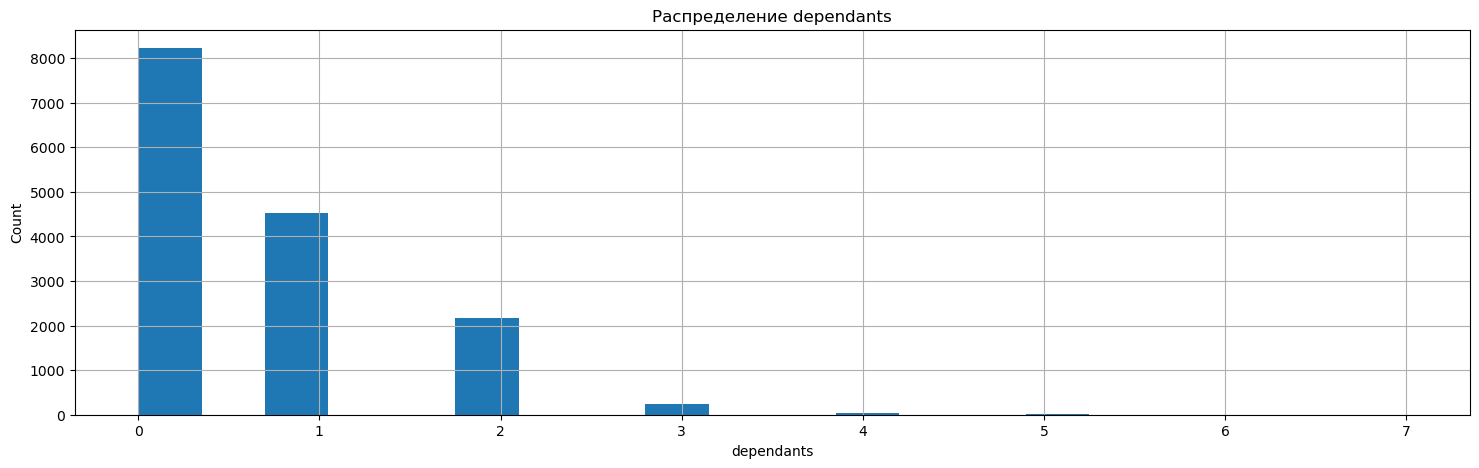

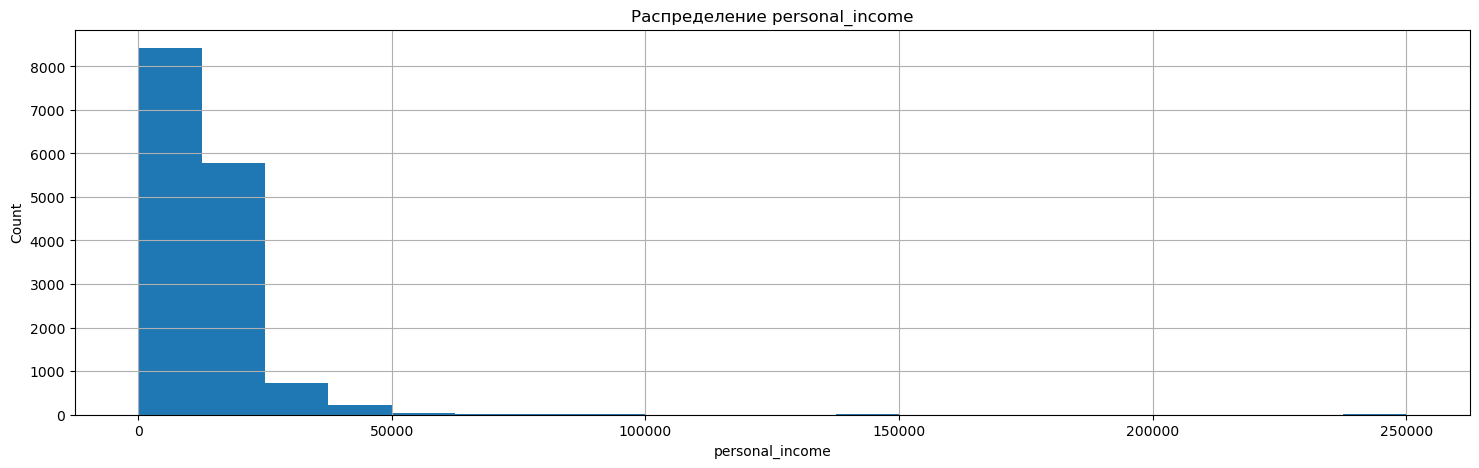

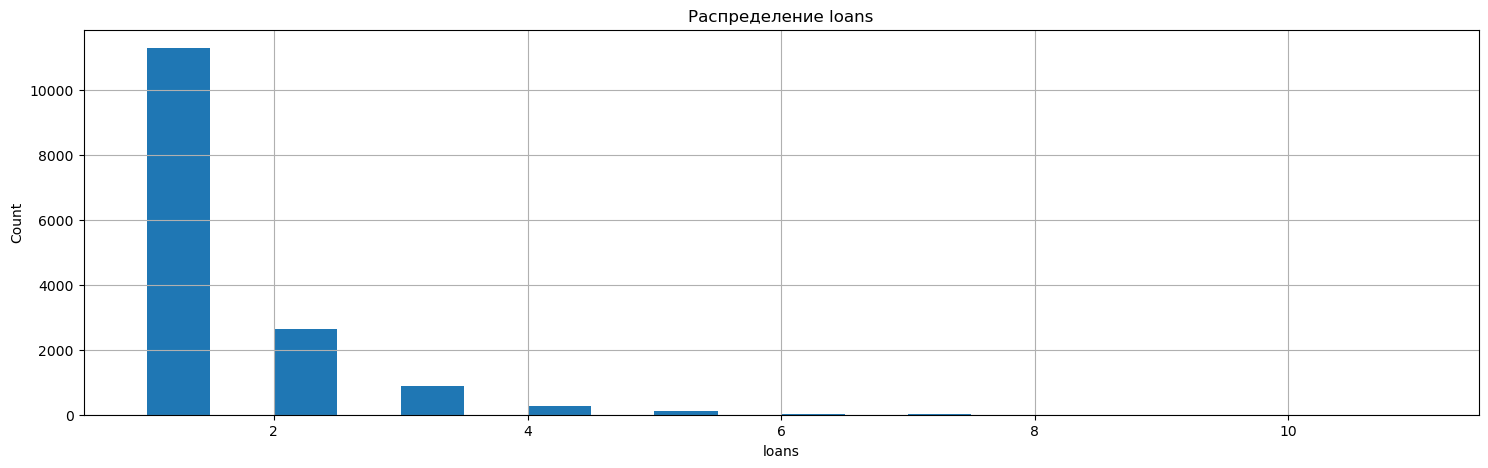

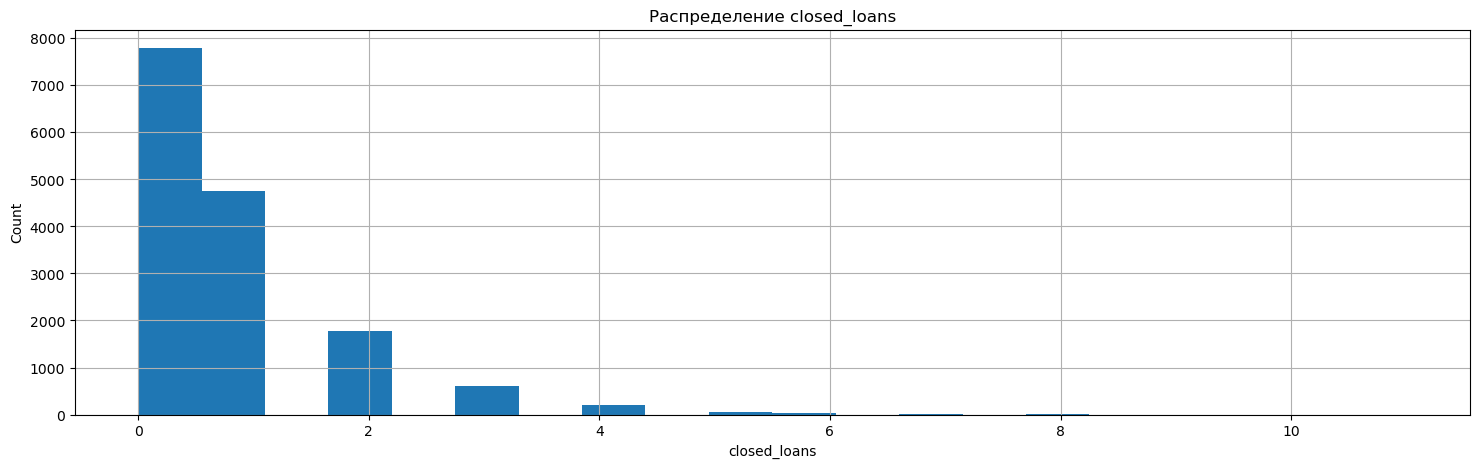

In [6]:
# Построим распределения переменных
plt.rc('figure', figsize=(18, 5))
for i in df.columns:
    df[i].hist(bins=20)
    plt.title('Распределение ' + i);
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()
    

Распределение целевой переменной неравномерное. По возрасту распределение условно можно назвать равномерны со смещением в область 20-40 лет. Большинство клиентов работают и не на пенсии. Мужчин больше, чем женщин. Количество клиентов с детьми больше, чем без детей. У многих клиентов дети уже взрослые и не явлются иждевенцами. Большинство клиентов имеют не высокий доход. Кредиты чаще берут 1 раз. Возвращают реже, чем берут. 

In [7]:
# раздедлите на обучающую и тестовую выборки
data_train, data_test = train_test_split(df, train_size=0.8, random_state=41)
X_train = data_train.drop(columns=['target'])
y_train = data_train[['target']]

X_test = data_test.drop(columns=['target'])
y_test = data_test[['target']]
# Ваш код здесь

In [8]:
# обучите модель методом ближайших соседей
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# Ваш код здесь

KNeighborsClassifier(n_neighbors=7)

In [9]:
print("Точность для обучающей выборки:", knn.score(X_train, y_train))

Точность для обучающей выборки: 0.8829857119395631


In [10]:
print("Точность для тестовой выборки:", knn.score(X_test, y_test))

Точность для тестовой выборки: 0.8784893267651889


In [11]:
print("Прогнозы для обучающей выборки:", knn.predict(X_train))

Прогнозы для обучающей выборки: [0 0 0 ... 0 0 0]


In [12]:
print("Прогнозы для обучающей выборки:", knn.predict_proba(X_train))

Прогнозы для обучающей выборки: [[0.85714286 0.14285714]
 [0.71428571 0.28571429]
 [1.         0.        ]
 ...
 [0.85714286 0.14285714]
 [0.85714286 0.14285714]
 [0.71428571 0.28571429]]


In [13]:
data = pd.DataFrame(columns=['class', 'predict_class'])
data['class'] = y_train
data['predict_class'] = knn.predict(X_train)
data

,class,predict_class
10413,0,0
13411,0,0
19,0,0
6148,0,0
14937,1,0
...,...,...
5200,0,0
4066,1,0
12172,0,0
931,0,0


In [14]:
# проверьте качество модели с помощью F-мера
TP = len(data[data['predict_class']==1][data['class'] == data['predict_class']])
TN = len(data[data['predict_class']==0][data['class'] == data['predict_class']])
FP = len(data[data['predict_class']==1][data['class'] != data['predict_class']])
FN = len(data[data['predict_class']==0][data['class'] != data['predict_class']])

# Ваш код здесь
print(TP,TN, FP, FN)

65 10688 35 1390


In [32]:
precision = TP/(TP+FP)
precision

0.65

In [33]:
recall = TP/(TP+FN)
recall

0.044673539518900345

In [34]:
f1 = 2*precision*recall/(precision+recall)
f1

0.08360128617363345

In [35]:
# проверьте качество модели с помощью матрицы сопряжённостей
res = classification_report(data['class'], data[['predict_class']])
print(res)
# Ваш код здесь

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10723
           1       0.65      0.04      0.08      1455

    accuracy                           0.88     12178
   macro avg       0.77      0.52      0.51     12178
weighted avg       0.86      0.88      0.84     12178



    # сделайте вывод о работе модели

    # Ваш текст здесь
    Модель не переобучена. Не смотря на высокий показатель метрики accuracy, т.к. выборка неравномерна по целовой переменной, этот показатель здесь не отражает полной картины. Показатель F-мера достаточно низкий, это говорит о том, что модель слабоприменима для задачи определения целевой переменной. Можно с не меньшей точностью просто отверждать, что целевая переменная равна нулю. 